In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import nengo
from nengo.utils.matplotlib import rasterplot

In [4]:
from nengo.dists import Uniform

model = nengo.Network(label="A Single Neuron")
with model:
    neuron = nengo.Ensemble(
        1,
        dimensions=1,  # Represent a scalar
        # Set intercept to 0.5
        intercepts=Uniform(-0.5, -0.5),
        # Set the maximum firing rate of the neuron to 100hz
        max_rates=Uniform(100, 100),
        # Set the neuron's firing rate to increase for positive input
        encoders=[[1]],
    )

In [5]:
with model:
    cos = nengo.Node(lambda t: np.cos(8 * t))

In [6]:
with model:
    # Connect the input signal to the neuron
    nengo.Connection(cos, neuron)

In [7]:
with model:
    # The original input
    cos_probe = nengo.Probe(cos)
    # The raw spikes from the neuron
    spikes = nengo.Probe(neuron.neurons)
    # Subthreshold soma voltage of the neuron
    voltage = nengo.Probe(neuron.neurons, "voltage")
    # Spikes filtered by a 10ms post-synaptic filter
    filtered = nengo.Probe(neuron, synapse=0.01)

In [8]:
with nengo.Simulator(model) as sim:  # Create the simulator
    sim.run(1)  # Run it for 1 second

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

(0.0, 1.0)

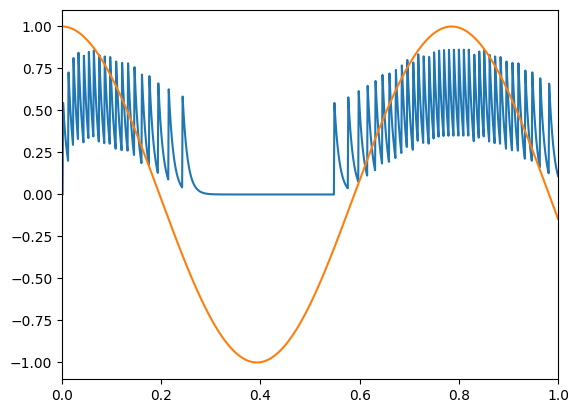

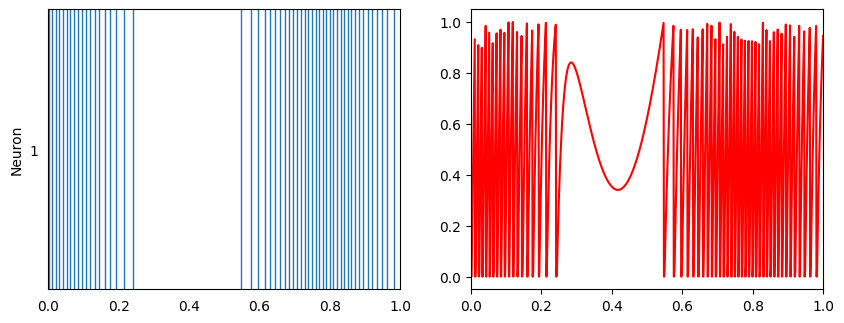

In [9]:
# Plot the decoded output of the ensemble
plt.figure()
plt.plot(sim.trange(), sim.data[filtered])
plt.plot(sim.trange(), sim.data[cos_probe])
plt.xlim(0, 1)

# Plot the spiking output of the ensemble
plt.figure(figsize=(10, 8))
plt.subplot(221)
rasterplot(sim.trange(), sim.data[spikes])
plt.ylabel("Neuron")
plt.xlim(0, 1)

# Plot the soma voltages of the neurons
plt.subplot(222)
plt.plot(sim.trange(), sim.data[voltage][:, 0], "r")
plt.xlim(0, 1)

In [10]:
model = nengo.Network(label="Two Neurons")
with model:
    neurons = nengo.Ensemble(
        2,
        dimensions=1,  # Representing a scalar
        intercepts=Uniform(-0.5, -0.5),  # Set the intercepts at .5
        max_rates=Uniform(100, 100),  # Set the max firing rate at 100hz
        encoders=[[1], [-1]],
    )  # One 'on' and one 'off' neuron

In [11]:
with model:
    sin = nengo.Node(lambda t: np.sin(8 * t))

In [12]:
with model:
    nengo.Connection(sin, neurons, synapse=0.01)

In [13]:
with model:
    sin_probe = nengo.Probe(sin)  # The original input
    spikes = nengo.Probe(neurons.neurons)  # Raw spikes from each neuron
    # Subthreshold soma voltages of the neurons
    voltage = nengo.Probe(neurons.neurons, "voltage")
    # Spikes filtered by a 10ms post-synaptic filter
    filtered = nengo.Probe(neurons, synapse=0.01)

In [14]:
with nengo.Simulator(model) as sim:  # Create a simulator
    sim.run(1)  # Run it for 1 second

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

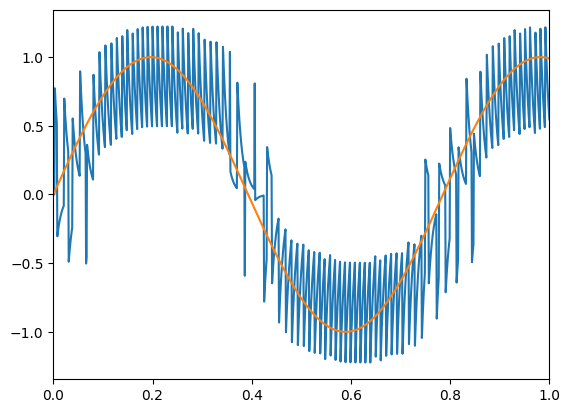

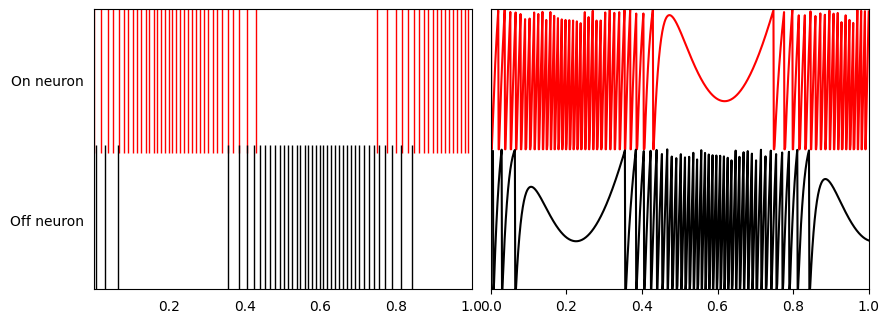

In [15]:
t = sim.trange()

# Plot the decoded output of the ensemble
plt.figure()
plt.plot(t, sim.data[filtered])
plt.plot(t, sim.data[sin_probe])
plt.xlim(0, 1)

# Plot the spiking output of the ensemble
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
rasterplot(t, sim.data[spikes], colors=[(1, 0, 0), (0, 0, 0)])
plt.yticks((1, 2), ("On neuron", "Off neuron"))
plt.ylim(2.5, 0.5)

# Plot the soma voltages of the neurons
plt.subplot(2, 2, 2)
plt.plot(t, sim.data[voltage][:, 0] + 1, "r")
plt.plot(t, sim.data[voltage][:, 1], "k")
plt.yticks(())
plt.axis([0, 1, 0, 2])
plt.subplots_adjust(wspace=0.05)

In [16]:
model = nengo.Network(label="Many Neurons")
with model:
    # Our ensemble consists of 100 leaky integrate-and-fire neurons,
    # representing a one-dimensional signal
    A = nengo.Ensemble(100, dimensions=1)

In [17]:
with model:
    sin = nengo.Node(lambda t: np.sin(8 * t))  # Input is a sine

In [18]:
with model:
    # Connect the input to the population
    nengo.Connection(sin, A, synapse=0.01)  # 10ms filter

In [19]:
with model:
    sin_probe = nengo.Probe(sin)
    A_probe = nengo.Probe(A, synapse=0.01)  # 10ms filter
    A_spikes = nengo.Probe(A.neurons)  # Collect the spikes

In [20]:
# Create our simulator
with nengo.Simulator(model) as sim:
    # Run it for 1 second
    sim.run(1)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

(0.0, 1.0)

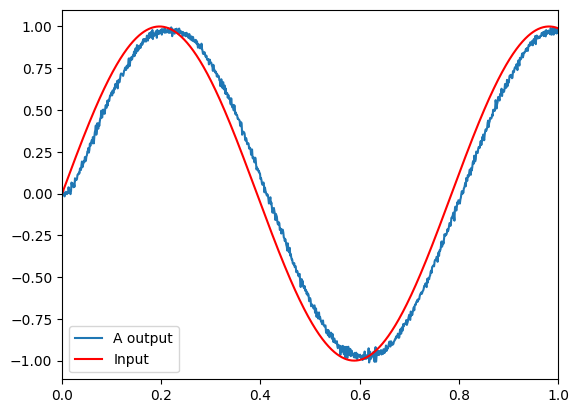

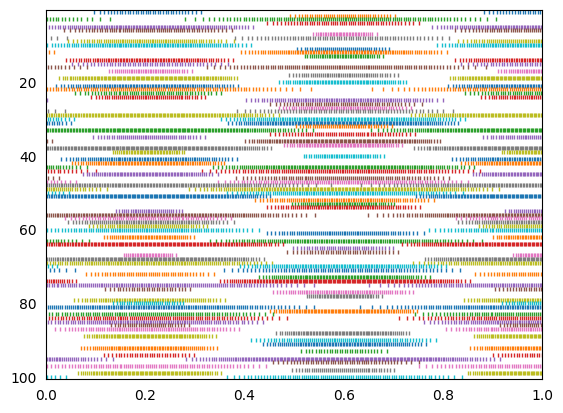

In [21]:
# Plot the decoded output of the ensemble
plt.figure()
plt.plot(sim.trange(), sim.data[A_probe], label="A output")
plt.plot(sim.trange(), sim.data[sin_probe], "r", label="Input")
plt.xlim(0, 1)
plt.legend()

# Plot the spiking output of the ensemble
plt.figure()
rasterplot(sim.trange(), sim.data[A_spikes])
plt.xlim(0, 1)

(0.0, 1.0)

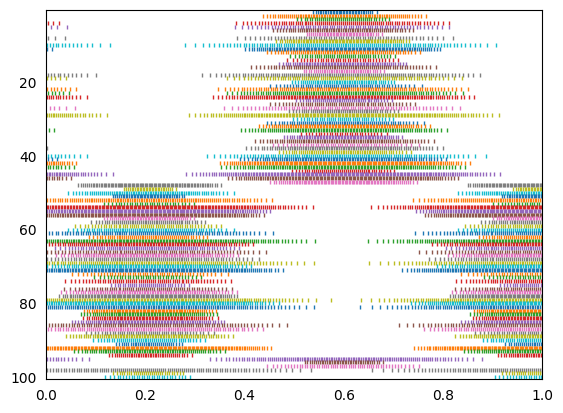

In [23]:
from nengo.utils.ensemble import sorted_neurons

# For interest's sake, you can also sort by encoder
indices = sorted_neurons(A, sim, iterations=250)
plt.figure()
rasterplot(sim.trange(), sim.data[A_spikes][:, indices])
plt.xlim(0, 1)

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import nengo

model = nengo.Network(label="2D Representation")
with model:
    # Our ensemble consists of 100 leaky integrate-and-fire neurons,
    # and represents a 2-dimensional signal
    neurons = nengo.Ensemble(100, dimensions=2)

In [25]:
with model:
    # Create input nodes representing the sine and cosine
    sin = nengo.Node(output=np.sin)
    cos = nengo.Node(output=np.cos)

In [26]:
with model:
    # The indices in neurons define which dimension the input will project to
    nengo.Connection(sin, neurons[0])
    nengo.Connection(cos, neurons[1])

In [27]:
with model:
    sin_probe = nengo.Probe(sin, "output")
    cos_probe = nengo.Probe(cos, "output")
    neurons_probe = nengo.Probe(neurons, "decoded_output", synapse=0.01)

In [28]:
with nengo.Simulator(model) as sim:
    sim.run(5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

Text(0.5, 0, 'time [s]')

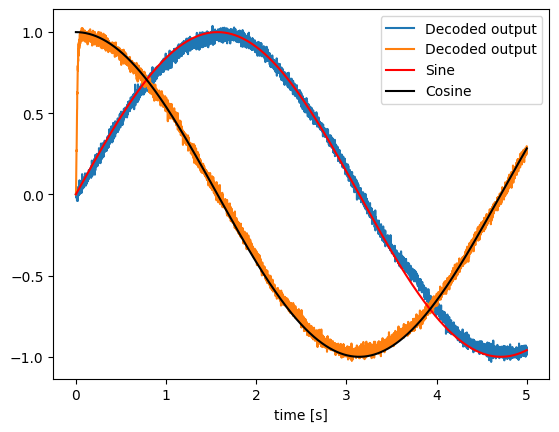

In [29]:
# Plot the decoded output of the ensemble
plt.figure()
plt.plot(sim.trange(), sim.data[neurons_probe], label="Decoded output")
plt.plot(sim.trange(), sim.data[sin_probe], "r", label="Sine")
plt.plot(sim.trange(), sim.data[cos_probe], "k", label="Cosine")
plt.legend()
plt.xlabel("time [s]")

In [30]:
model = nengo.Network(label="Combining")
with model:
    # Our input ensembles consist of 100 leaky integrate-and-fire neurons,
    # representing a one-dimensional signal
    A = nengo.Ensemble(100, dimensions=1)
    B = nengo.Ensemble(100, dimensions=1)

    # The output ensemble consists of 200 leaky integrate-and-fire neurons,
    # representing a two-dimensional signal
    output = nengo.Ensemble(200, dimensions=2, label="2D Population")

In [31]:
with model:
    # Create input nodes generating the sine and cosine
    sin = nengo.Node(output=np.sin)
    cos = nengo.Node(output=np.cos)

In [32]:
with model:
    nengo.Connection(sin, A)
    nengo.Connection(cos, B)

    # The square brackets define which dimension the input will project to
    nengo.Connection(A, output[1])
    nengo.Connection(B, output[0])

In [33]:
with model:
    sin_probe = nengo.Probe(sin)
    cos_probe = nengo.Probe(cos)
    A_probe = nengo.Probe(A, synapse=0.01)  # 10ms filter
    B_probe = nengo.Probe(B, synapse=0.01)  # 10ms filter
    out_probe = nengo.Probe(output, synapse=0.01)  # 10ms filter

In [34]:
# Create our simulator
with nengo.Simulator(model) as sim:
    # Run it for 5 seconds
    sim.run(5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

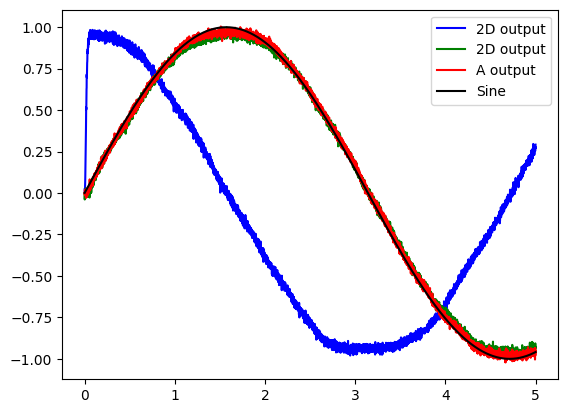

In [35]:
# Plot the decoded output of the ensemble
plt.figure()
plt.plot(sim.trange(), sim.data[out_probe][:, 0], "b", label="2D output")
plt.plot(sim.trange(), sim.data[out_probe][:, 1], "g", label="2D output")
plt.plot(sim.trange(), sim.data[A_probe], "r", label="A output")
plt.plot(sim.trange(), sim.data[sin_probe], "k", label="Sine")
plt.legend()

In [36]:
# Create the model object
model = nengo.Network(label="Addition")
with model:
    # Create 3 ensembles each containing 100 leaky integrate-and-fire neurons
    A = nengo.Ensemble(100, dimensions=1)
    B = nengo.Ensemble(100, dimensions=1)
    C = nengo.Ensemble(100, dimensions=1)

In [37]:
with model:
    # Create input nodes representing constant values
    input_a = nengo.Node(output=0.5)
    input_b = nengo.Node(output=0.3)

    # Connect the input nodes to the appropriate ensembles
    nengo.Connection(input_a, A)
    nengo.Connection(input_b, B)

    # Connect input ensembles A and B to output ensemble C
    nengo.Connection(A, C)
    nengo.Connection(B, C)

In [38]:
with model:
    input_a_probe = nengo.Probe(input_a)
    input_b_probe = nengo.Probe(input_b)
    A_probe = nengo.Probe(A, synapse=0.01)
    B_probe = nengo.Probe(B, synapse=0.01)
    C_probe = nengo.Probe(C, synapse=0.01)

In [39]:
# Create the simulator
with nengo.Simulator(model) as sim:
    # Run it for 5 seconds
    sim.run(5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

Text(0.5, 0, 'time [s]')

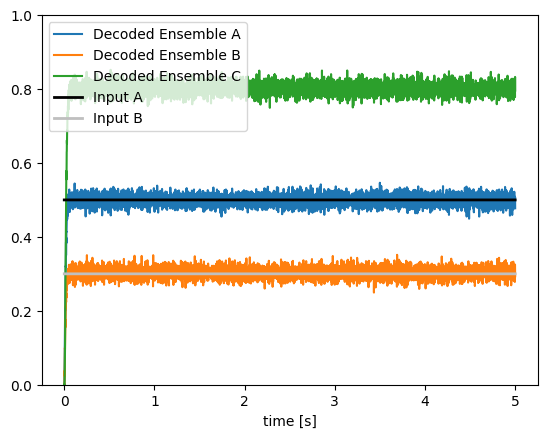

In [40]:
# Plot the input signals and decoded ensemble values
t = sim.trange()
plt.figure()
plt.plot(sim.trange(), sim.data[A_probe], label="Decoded Ensemble A")
plt.plot(sim.trange(), sim.data[B_probe], label="Decoded Ensemble B")
plt.plot(sim.trange(), sim.data[C_probe], label="Decoded Ensemble C")
plt.plot(
    sim.trange(), sim.data[input_a_probe], label="Input A", color="k", linewidth=2.0
)
plt.plot(
    sim.trange(), sim.data[input_b_probe], label="Input B", color="0.75", linewidth=2.0
)
plt.legend()
plt.ylim(0, 1)
plt.xlabel("time [s]")

In [45]:
# Create a 'model' object to which we can add ensembles, connections, etc.
model = nengo.Network(label="Communications Channel")
with model:
    # Create an abstract input signal that oscillates as sin(t)
    # sin = nengo.Node(np.sin)
    sin = nengo.Node(lambda t: np.sin(2*np.pi*t))


    # Create the neuronal ensembles
    A = nengo.Ensemble(100, dimensions=1)
    B = nengo.Ensemble(100, dimensions=1)

    # Connect the input to the first neuronal ensemble
    nengo.Connection(sin, A)

    # Connect the first neuronal ensemble to the second
    # (this is the communication channel)
    nengo.Connection(A, B)

In [46]:
with model:
    sin_probe = nengo.Probe(sin)
    A_probe = nengo.Probe(A, synapse=0.01)  # ensemble output
    B_probe = nengo.Probe(B, synapse=0.01)

In [47]:
with nengo.Simulator(model) as sim:
    sim.run(2)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

(0.0, 1.2)

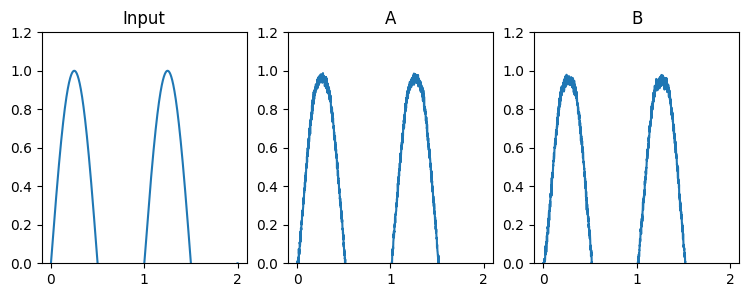

In [48]:
plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.title("Input")
plt.plot(sim.trange(), sim.data[sin_probe])
plt.ylim(0, 1.2)
plt.subplot(1, 3, 2)
plt.title("A")
plt.plot(sim.trange(), sim.data[A_probe])
plt.ylim(0, 1.2)
plt.subplot(1, 3, 3)
plt.title("B")
plt.plot(sim.trange(), sim.data[B_probe])
plt.ylim(0, 1.2)

In [49]:
# Create the model object
model = nengo.Network(label="Squaring")
with model:
    # Create two ensembles of 100 leaky-integrate-and-fire neurons
    A = nengo.Ensemble(100, dimensions=1)
    B = nengo.Ensemble(100, dimensions=1)

In [50]:
with model:
    # Create an input node that represents a sine wave
    sin = nengo.Node(np.sin)

    # Connect the input node to ensemble A
    nengo.Connection(sin, A)

    # Define the squaring function
    def square(x):
        return x[0] * x[0]

    # Connection ensemble A to ensemble B
    nengo.Connection(A, B, function=square)

In [51]:
with model:
    sin_probe = nengo.Probe(sin)
    A_probe = nengo.Probe(A, synapse=0.01)
    B_probe = nengo.Probe(B, synapse=0.01)

In [52]:
# Create the simulator
with nengo.Simulator(model) as sim:
    # Run the simulator for 5 seconds
    sim.run(5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

(-1.2, 1.2)

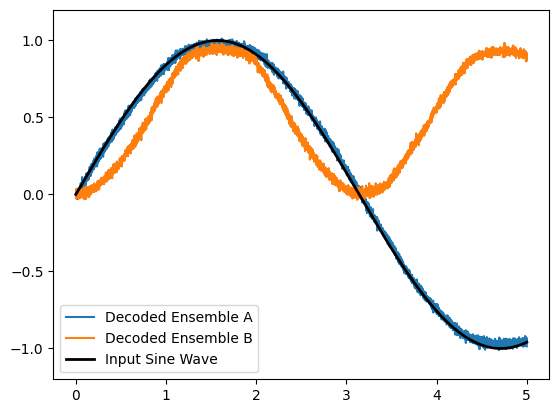

In [53]:
# Plot the input signal and decoded ensemble values
plt.figure()
plt.plot(sim.trange(), sim.data[A_probe], label="Decoded Ensemble A")
plt.plot(sim.trange(), sim.data[B_probe], label="Decoded Ensemble B")
plt.plot(
    sim.trange(), sim.data[sin_probe], label="Input Sine Wave", color="k", linewidth=2.0
)
plt.legend(loc="best")
plt.ylim(-1.2, 1.2)

In [54]:
from nengo.dists import Choice
from nengo.processes import Piecewise
# Create the model object
model = nengo.Network(label="Multiplication")
with model:
    # Create 4 ensembles of leaky integrate-and-fire neurons
    A = nengo.Ensemble(100, dimensions=1, radius=10)
    B = nengo.Ensemble(100, dimensions=1, radius=10)
    combined = nengo.Ensemble(
        220, dimensions=2, radius=15
    )  # This radius is ~sqrt(10^2+10^2)
    prod = nengo.Ensemble(100, dimensions=1, radius=20)

# This next two lines make all of the encoders in the Combined population
# point at the corners of the cube.
# This improves the quality of the computation.

# Comment out the line below for 'normal' encoders
combined.encoders = Choice([[1, 1], [-1, 1], [1, -1], [-1, -1]])

In [55]:
with model:
    # Create a piecewise step function for input
    inputA = nengo.Node(Piecewise({0: 0, 2.5: 10, 4: -10}))
    inputB = nengo.Node(Piecewise({0: 10, 1.5: 2, 3: 0, 4.5: 2}))

    correct_ans = Piecewise({0: 0, 1.5: 0, 2.5: 20, 3: 0, 4: 0, 4.5: -20})

In [56]:
with model:
    # Connect the input nodes to the appropriate ensembles
    nengo.Connection(inputA, A)
    nengo.Connection(inputB, B)

    # Connect input ensembles A and B to the 2D combined ensemble
    nengo.Connection(A, combined[0])
    nengo.Connection(B, combined[1])

    # Define a function that computes the multiplication of two inputs
    def product(x):
        return x[0] * x[1]

    # Connect the combined ensemble to the output ensemble D
    nengo.Connection(combined, prod, function=product)

In [57]:
with model:
    inputA_probe = nengo.Probe(inputA)
    inputB_probe = nengo.Probe(inputB)
    A_probe = nengo.Probe(A, synapse=0.01)
    B_probe = nengo.Probe(B, synapse=0.01)
    combined_probe = nengo.Probe(combined, synapse=0.01)
    prod_probe = nengo.Probe(prod, synapse=0.01)

In [58]:
# Create the simulator
with nengo.Simulator(model) as sim:
    # Run it for 5 seconds
    sim.run(5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

(-25.0, 25.0)

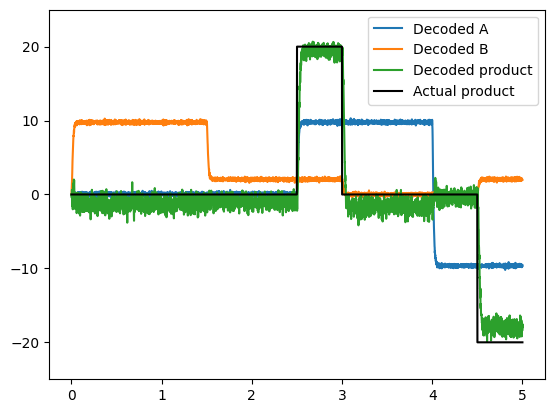

In [59]:
# Plot the input signals and decoded ensemble values
plt.figure()
plt.plot(sim.trange(), sim.data[A_probe], label="Decoded A")
plt.plot(sim.trange(), sim.data[B_probe], label="Decoded B")
plt.plot(sim.trange(), sim.data[prod_probe], label="Decoded product")
plt.plot(
    sim.trange(), correct_ans.run(sim.time, dt=sim.dt), c="k", label="Actual product"
)
plt.legend(loc="best")
plt.ylim(-25, 25)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

(-25.0, 25.0)

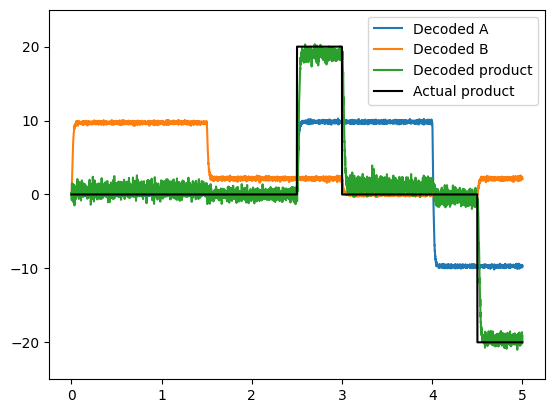

In [60]:
def Product(neuron_per_dimension, input_magnitude):
    # Create the model object
    model = nengo.Network(label="Product")
    with model:
        # Create passthrough nodes to redirect both inputs
        model.A = nengo.Node(output=None, size_in=1)
        model.B = nengo.Node(output=None, size_in=1)

        model.combined = nengo.Ensemble(
            neuron_per_dimension * 2,
            dimensions=2,
            radius=np.sqrt(input_magnitude**2 + input_magnitude**2),
            encoders=Choice([[1, 1], [-1, 1], [1, -1], [-1, -1]]),
        )

        model.prod = nengo.Ensemble(
            neuron_per_dimension, dimensions=1, radius=input_magnitude * 2
        )

        # Connect everything up
        nengo.Connection(model.A, model.combined[0], synapse=None)
        nengo.Connection(model.B, model.combined[1], synapse=None)

        def product(x):
            return x[0] * x[1]

        nengo.Connection(model.combined, model.prod, function=product)
    return model


# The previous model can then be replicated with the following
model = nengo.Network(label="Multiplication")
with model:
    inputA = nengo.Node(Piecewise({0: 0, 2.5: 10, 4: -10}))
    inputB = nengo.Node(Piecewise({0: 10, 1.5: 2, 3: 0, 4.5: 2}))
    A = nengo.Ensemble(100, dimensions=1, radius=10)
    B = nengo.Ensemble(100, dimensions=1, radius=10)
    prod = Product(100, input_magnitude=10)
    nengo.Connection(inputA, A)
    nengo.Connection(inputB, B)
    nengo.Connection(A, prod.A)
    nengo.Connection(B, prod.B)

    inputA_probe = nengo.Probe(inputA)
    inputB_probe = nengo.Probe(inputB)
    A_probe = nengo.Probe(A, synapse=0.01)
    B_probe = nengo.Probe(B, synapse=0.01)
    combined_probe = nengo.Probe(prod.combined, synapse=0.01)
    prod_probe = nengo.Probe(prod.prod, synapse=0.01)

# Create the simulator
with nengo.Simulator(model) as sim:
    # Run it for 5 seconds
    sim.run(5)

# Plot the input signals and decoded ensemble values
plt.figure()
plt.plot(sim.trange(), sim.data[A_probe], label="Decoded A")
plt.plot(sim.trange(), sim.data[B_probe], label="Decoded B")
plt.plot(sim.trange(), sim.data[prod_probe], label="Decoded product")
plt.plot(
    sim.trange(), correct_ans.run(sim.time, dt=sim.dt), c="k", label="Actual product"
)
plt.legend(loc="best")
plt.ylim(-25, 25)

In [61]:
model = nengo.Network(label="Integrator")
with model:
    # Our ensemble consists of 100 leaky integrate-and-fire neurons,
    # representing a one-dimensional signal
    A = nengo.Ensemble(100, dimensions=1)

In [62]:
# Create a piecewise step function for input
with model:
    input = nengo.Node(Piecewise({0: 0, 0.2: 1, 1: 0, 2: -2, 3: 0, 4: 1, 5: 0}))

In [63]:
with model:
    # Connect the population to itself
    tau = 0.1
    nengo.Connection(
        A, A, transform=[[1]], synapse=tau
    )  # Using a long time constant for stability

    # Connect the input
    nengo.Connection(
        input, A, transform=[[tau]], synapse=tau
    )  # The same time constant as recurrent to make it more 'ideal'

In [64]:
with model:
    # Add probes
    input_probe = nengo.Probe(input)
    A_probe = nengo.Probe(A, synapse=0.01)

In [65]:
# Create our simulator
with nengo.Simulator(model) as sim:
    # Run it for 6 seconds
    sim.run(6)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

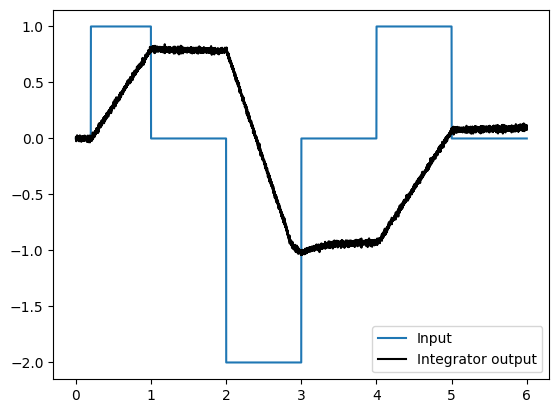

In [66]:
# Plot the decoded output of the ensemble
plt.figure()
plt.plot(sim.trange(), sim.data[input_probe], label="Input")
plt.plot(sim.trange(), sim.data[A_probe], "k", label="Integrator output")
plt.legend()

In [67]:
model = nengo.Network(label="Controlled Integrator")
with model:
    # Make a population with 225 LIF neurons
    # representing a 2 dimensional signal,
    # with a larger radius to accommodate large inputs
    A = nengo.Ensemble(225, dimensions=2, radius=1.5)

In [68]:
with model:
    # Create a piecewise step function for input
    input_func = Piecewise({0: 0, 0.2: 5, 0.3: 0, 0.44: -10, 0.54: 0, 0.8: 5, 0.9: 0})

In [69]:
with model:
    # Define an input signal within our model
    inp = nengo.Node(input_func)

    # Connect the Input signal to ensemble A.
    # The `transform` argument means "connect real-valued signal
    # "Input" to the first of the two input channels of A."
    tau = 0.1
    nengo.Connection(inp, A, transform=[[tau], [0]], synapse=tau)

In [70]:
with model:
    # Another piecewise step that changes half way through the run
    control_func = Piecewise({0: 1, 0.6: 0.5})

In [71]:
with model:
    control = nengo.Node(output=control_func)

    # Connect the "Control" signal to the second of A's two input channels.
    nengo.Connection(control, A[1], synapse=0.005)

In [72]:
with model:
    # Create a recurrent connection that first takes the product
    # of both dimensions in A (i.e., the value times the control)
    # and then adds this back into the first dimension of A using
    # a transform
    nengo.Connection(
        A,
        A[0],  # -- transform converts function output to new state inputs
        function=lambda x: x[0] * x[1],  # -- function is applied first to A
        synapse=tau,
    )

    # Record both dimensions of A
    A_probe = nengo.Probe(A, "decoded_output", synapse=0.01)

In [73]:
with nengo.Simulator(model) as sim:  # Create a simulator
    sim.run(1.4)  # Run for 1.4 seconds

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

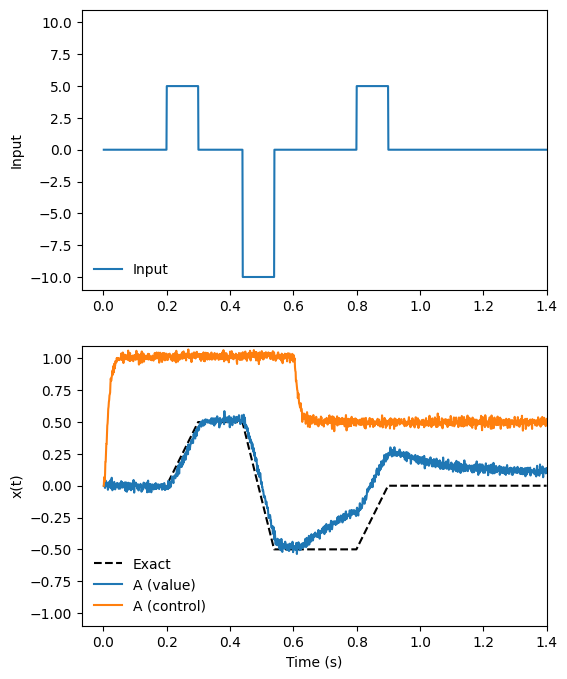

In [74]:
# Plot the value and control signals, along with the exact integral
t = sim.trange()
dt = t[1] - t[0]
input_sig = input_func.run(t[-1], dt=dt)
control_sig = control_func.run(t[-1], dt=dt)
ref = dt * np.cumsum(input_sig)

plt.figure(figsize=(6, 8))
plt.subplot(2, 1, 1)
plt.plot(t, input_sig, label="Input")
plt.xlim(right=t[-1])
plt.ylim(-11, 11)
plt.ylabel("Input")
plt.legend(loc="lower left", frameon=False)

plt.subplot(2, 1, 2)
plt.plot(t, ref, "k--", label="Exact")
plt.plot(t, sim.data[A_probe][:, 0], label="A (value)")
plt.plot(t, sim.data[A_probe][:, 1], label="A (control)")
plt.xlim(right=t[-1])
plt.ylim(-1.1, 1.1)
plt.xlabel("Time (s)")
plt.ylabel("x(t)")
plt.legend(loc="lower left", frameon=False)

In [75]:
model = nengo.Network(label="Controlled Integrator 2")
with model:
    # Make a population with 225 LIF neurons representing a 2 dimensional
    # signal, with a larger radius to accommodate large inputs
    A = nengo.Ensemble(225, dimensions=2, radius=1.5)


In [76]:
with model:
    # Create a piecewise step function for input
    input_func = Piecewise({0.2: 5, 0.3: 0, 0.44: -10, 0.54: 0, 0.8: 5, 0.9: 0})
    inp = nengo.Node(output=input_func)

    # Connect the Input signal to ensemble A.
    tau = 0.1
    nengo.Connection(inp, A, transform=[[tau], [0]], synapse=0.1)

In [77]:
with model:
    # Another piecewise function that changes half way through the run
    control_func = Piecewise({0: 0, 0.6: -0.5})
    control = nengo.Node(output=control_func)

    # Connect the "Control" signal to the second of A's two input channels
    nengo.Connection(control, A[1], synapse=0.005)

In [78]:
with model:
    # Note the changes from the previous example to the function being defined.
    nengo.Connection(A, A[0], function=lambda x: x[0] * x[1] + x[0], synapse=tau)

    # Record both dimensions of A
    A_probe = nengo.Probe(A, "decoded_output", synapse=0.01)

In [79]:
with nengo.Simulator(model) as sim:  # Create a simulator
    sim.run(1.4)  # Run for 1.4 seconds

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

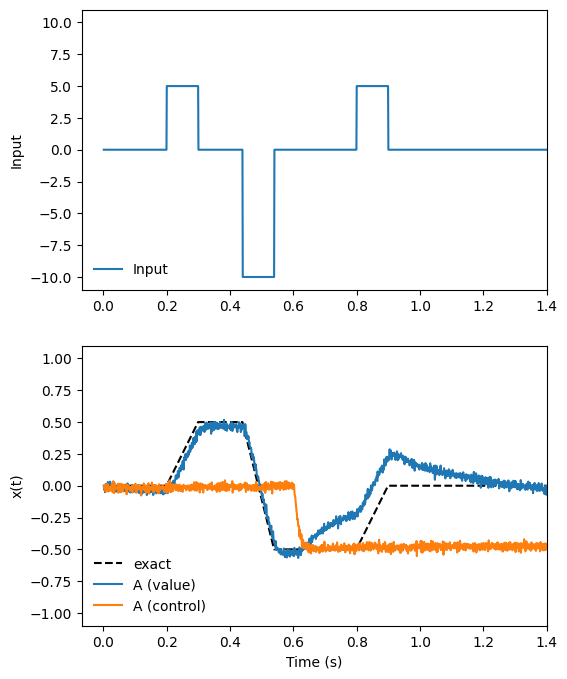

In [80]:
# Plot the value and control signals, along with the exact integral
t = sim.trange()
dt = t[1] - t[0]
input_sig = input_func.run(t[-1], dt=dt)
control_sig = control_func.run(t[-1], dt=dt)
ref = dt * np.cumsum(input_sig)

plt.figure(figsize=(6, 8))
plt.subplot(2, 1, 1)
plt.plot(t, input_sig, label="Input")
plt.xlim(right=t[-1])
plt.ylim(-11, 11)
plt.ylabel("Input")
plt.legend(loc="lower left", frameon=False)

plt.subplot(212)
plt.plot(t, ref, "k--", label="exact")
plt.plot(t, sim.data[A_probe][:, 0], label="A (value)")
plt.plot(t, sim.data[A_probe][:, 1], label="A (control)")
plt.xlim(right=t[-1])
plt.ylim(-1.1, 1.1)
plt.xlabel("Time (s)")
plt.ylabel("x(t)")
plt.legend(loc="lower left", frameon=False)

In [81]:
# Create the model object
model = nengo.Network(label="Oscillator")
with model:
    # Create the ensemble for the oscillator
    neurons = nengo.Ensemble(200, dimensions=2)

In [82]:
with model:
    # Create an input signal
    input = nengo.Node(Piecewise({0: [1, 0], 0.1: [0, 0]}))

    # Connect the input signal to the neural ensemble
    nengo.Connection(input, neurons)

    # Create the feedback connection
    nengo.Connection(neurons, neurons, transform=[[1, 1], [-1, 1]], synapse=0.1)

In [83]:
with model:
    input_probe = nengo.Probe(input, "output")
    neuron_probe = nengo.Probe(neurons, "decoded_output", synapse=0.1)

In [89]:
# Create the simulator
with nengo.Simulator(model) as sim:
    # Run it for 5 seconds
    sim.run(25)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

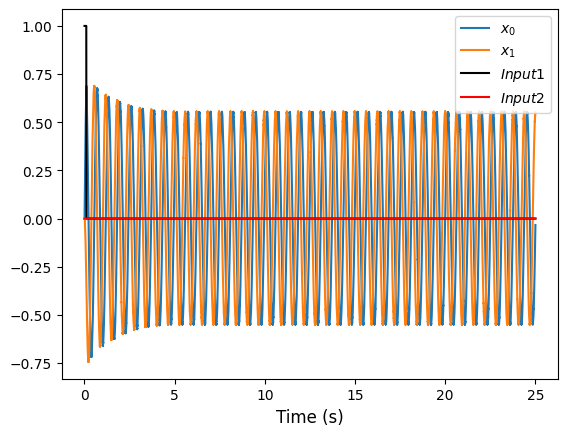

In [90]:
plt.figure()
plt.plot(sim.trange(), sim.data[neuron_probe])
plt.plot(sim.trange(), sim.data[input_probe][:, 0], "k", label="Input x")
plt.plot(sim.trange(), sim.data[input_probe][:, 1], "r", label="Input y")
plt.xlabel("Time (s)", fontsize="large")
plt.legend(["$x_0$", "$x_1$", "$Input 1$", "$Input 2$"])

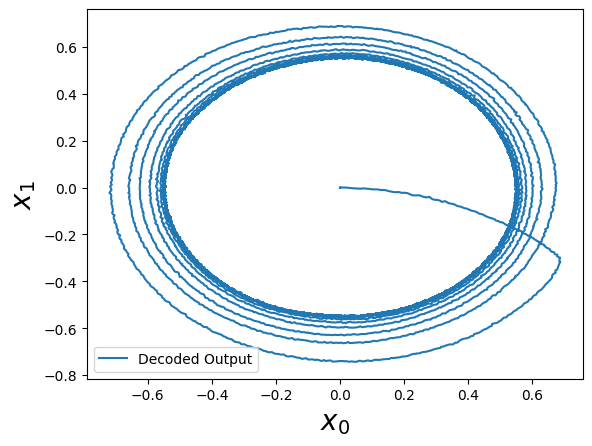

In [91]:
data = sim.data[neuron_probe]
plt.figure()
plt.plot(data[:, 0], data[:, 1], label="Decoded Output")
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$", fontsize=20)
plt.legend()

In [92]:
tau = 0.1  # Post-synaptic time constant for feedback
w_max = 10  # Maximum frequency in Hz is w_max/(2*pi)

model = nengo.Network(label="Controlled Oscillator")
with model:
    # The ensemble for the oscillator
    oscillator = nengo.Ensemble(500, dimensions=3, radius=1.7)

    # The feedback connection
    def feedback(x):
        x0, x1, w = x  # These are the three variables stored in the ensemble
        return x0 - w * w_max * tau * x1, x1 + w * w_max * tau * x0, 0

    nengo.Connection(oscillator, oscillator, function=feedback, synapse=tau)

    # The ensemble for controlling the speed of oscillation
    frequency = nengo.Ensemble(100, dimensions=1)

    nengo.Connection(frequency, oscillator[2])

In [93]:
with model:
    # We need a quick input at the beginning to start the oscillator
    initial = nengo.Node(Piecewise({0: [1, 0, 0], 0.15: [0, 0, 0]}))
    nengo.Connection(initial, oscillator)

    # Vary the speed over time
    input_frequency = nengo.Node(Piecewise({0: 1, 1: 0.5, 2: 0, 3: -0.5, 4: -1}))

    nengo.Connection(input_frequency, frequency)

In [94]:
with model:
    # Indicate which values to record
    oscillator_probe = nengo.Probe(oscillator, synapse=0.03)

In [96]:
with nengo.Simulator(model) as sim:
    sim.run(5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

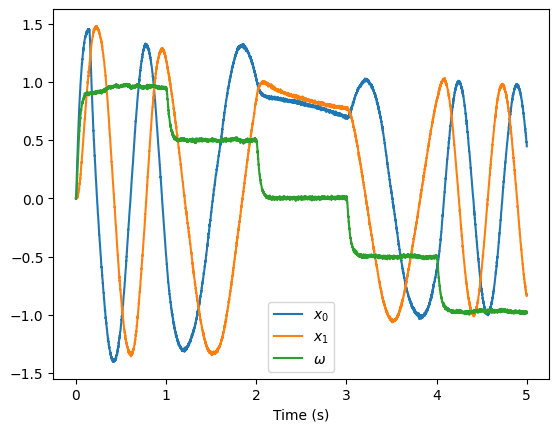

In [97]:
plt.figure()
plt.plot(sim.trange(), sim.data[oscillator_probe])
plt.xlabel("Time (s)")
plt.legend(["$x_0$", "$x_1$", r"$\omega$"])

In [99]:
from mpl_toolkits.mplot3d import Axes3D
tau = 0.1
sigma = 10
beta = 8.0 / 3
rho = 28


def feedback(x):
    dx0 = -sigma * x[0] + sigma * x[1]
    dx1 = -x[0] * x[2] - x[1]
    dx2 = x[0] * x[1] - beta * (x[2] + rho) - rho

    return [
        dx0 * tau + x[0],
        dx1 * tau + x[1],
        dx2 * tau + x[2],
    ]


model = nengo.Network(label="Lorenz attractor")
with model:
    state = nengo.Ensemble(2000, 3, radius=60)
    nengo.Connection(state, state, function=feedback, synapse=tau)
    state_probe = nengo.Probe(state, synapse=tau)

with nengo.Simulator(model) as sim:
    sim.run(10)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

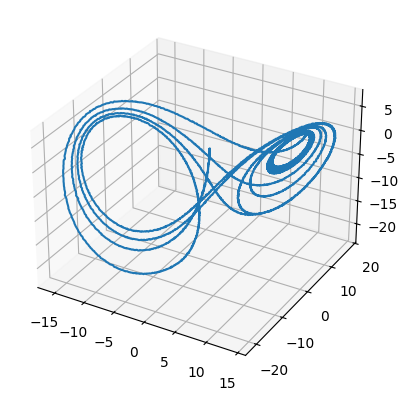

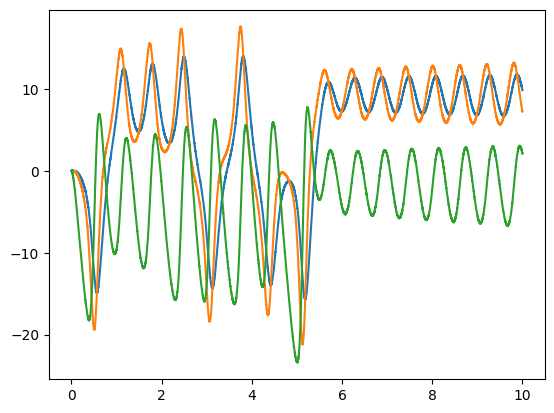

In [100]:
ax = plt.figure().add_subplot(111, projection=Axes3D.name)
ax.plot(*sim.data[state_probe].T)

plt.figure()
plt.plot(sim.trange(), sim.data[state_probe])